<a href="https://colab.research.google.com/github/KirtiNayak11/MultiCancerDetection/blob/main/MultiCancerDetection_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Setting Up Kaggle API Credentials**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Downloading the Multi-Cancer dataset**

In [ ]:
!kaggle datasets download -d obulisainaren/multi-cancer

100% 8.60G/8.62G [01:08<00:00, 181MB/s]
100% 8.62G/8.62G [01:08<00:00, 135MB/s]


**Extracting Multi-Cancer Dataset**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/multi-cancer.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/ComputerVision/Photos')
zip_ref.close()

**Class Distribution Analysis for MultiCancer Dataset**

In [ ]:
import tensorflow as tf
import os
import shutil

In [ ]:
os.makedirs("/content/drive/MyDrive/ComputerVision/Task1",exist_ok=True)

In [ ]:
source_path="/content/drive/MyDrive/ComputerVision/Photos/Multi Cancer/Cervical Cancer/cervix_sfi"
destination_path="/content/drive/MyDrive/ComputerVision/Task1"

if os.path.exists(source_path):
  if not os.path.exists(destination_path):
    os.makedirs("destination_path")
  shutil.move(source_path,destination_path)
else:
  print("path doesn't exist")


In [ ]:
data_dir="/content/drive/MyDrive/ComputerVision/Task1"

In [ ]:
import os
class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

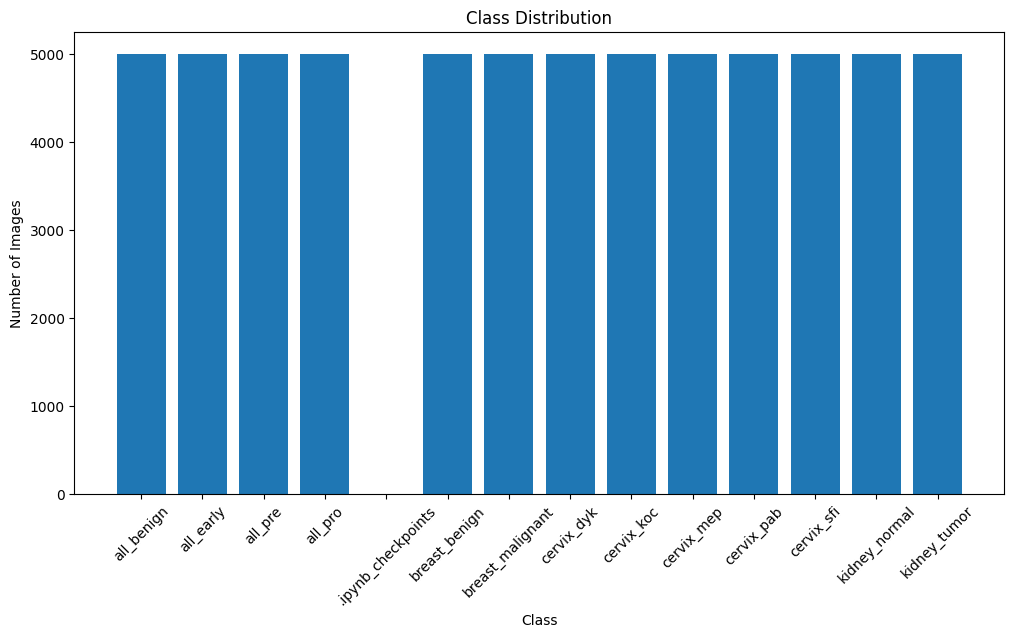

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

**Loading and Preprocessing Image**

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ComputerVision/Task1",
    image_size=(48, 48),
    batch_size=16,
    seed=123,
    shuffle=True,
    label_mode="categorical"
)

Found 65000 files belonging to 13 classes.


In [ ]:
class_names = dataset.class_names
class_names

['all_benign',
 'all_early',
 'all_pre',
 'all_pro',
 'breast_benign',
 'breast_malignant',
 'cervix_dyk',
 'cervix_koc',
 'cervix_mep',
 'cervix_pab',
 'cervix_sfi',
 'kidney_normal',
 'kidney_tumor']

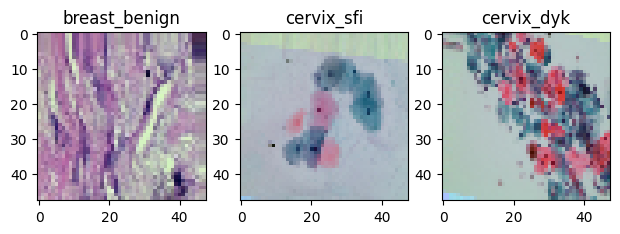

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(3):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        label_index = tf.where(labels_batch[i] == 1).numpy()[0][0]
        plt.title(class_names[label_index])

plt.show()

**Splitting Dataset into Train, Validation, and Test Sets**

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.7,val_split=0.15,test_split=0.15, shuffle=False, shuffle_size=500):
    assert (train_split + val_split + test_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255.0)

In [ ]:
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

In [ ]:
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

In [ ]:
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

**Building Multi-Class Cancer Classification Model**

In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K

from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers, models
import cv2
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import SGD

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False)
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(13,activation='softmax')(x)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history1=model.fit(train_ds,epochs=5,batch_size=16,validation_data=val_ds,callbacks=[early_stopping])

Epoch 1/5
2844/2844 [==============================] - 2805s 964ms/step - loss: 0.3562 - accuracy: 0.8745 - val_loss: 0.0547 - val_accuracy: 0.9814
Epoch 2/5
2844/2844 [==============================] - 598s 210ms/step - loss: 0.1127 - accuracy: 0.9621 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 3/5
2844/2844 [==============================] - 1374s 483ms/step - loss: 0.0753 - accuracy: 0.9744 - val_loss: 0.0321 - val_accuracy: 0.9882
Epoch 4/5
2844/2844 [==============================] - 532s 187ms/step - loss: 0.0570 - accuracy: 0.9811 - val_loss: 0.0266 - val_accuracy: 0.9898
Epoch 5/5
2844/2844 [==============================] - 1736s 611ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0386 - val_accuracy: 0.9864


**Evaluating Model Performance on Test Data**

In [ ]:
test_results = model.evaluate(test_ds)

print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

610/610 [==============================] - 592s 712ms/step - loss: 0.0386 - accuracy: 0.9869
Test Loss: 0.038644563406705856
Test Accuracy: 0.9868744611740112


**Testing Model Performance on a Sample from Test Dataset**

In [ ]:
import numpy as np

1/1 [==============================] - 3s 3s/step
actual label: all_early
predicted label: all_early


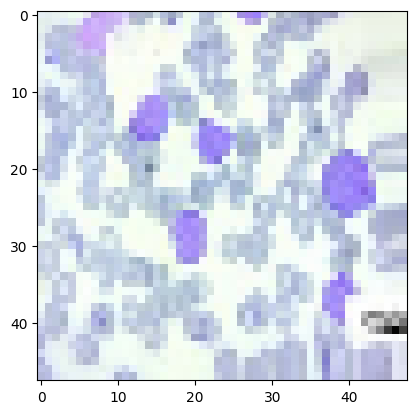

In [ ]:
for images, labels in test_ds.take(1):
        for i in range(1):
            image = images[i]
            actual_label = tf.argmax(labels[i]).numpy()

            plt.imshow(image)

            predictedValue = model.predict(np.expand_dims(image, axis=0))
            predicted_label = np.argmax(predictedValue)

            print("actual label:", class_names[actual_label])
            print("predicted label:", class_names[predicted_label])


**Analyzing Model Performance: Confusion Matrix and Classification Report**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

true_labels = []

predicted_labels = []

for image_batch, labels_batch in test_ds:
    n= image_batch.shape[0]

    for i in range(n):
      batch_prediction = model.predict(np.expand_dims(image_batch[i], axis=0))
      predicted_indices_batch = np.argmax(batch_prediction)
      predicted_labels.append(predicted_indices_batch)

      label_index = tf.where(labels_batch[i] == 1).numpy()[0][0]
      true_labels.append(label_index)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step


In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[759   0   0   1   0   0   0   0   0   0   0   0   0]
 [ 21 742   2   2   0   0   0   0   0   0   0   0   0]
 [  0   0 755   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 765   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 708  11   0   0   0   0   0   0   0]
 [  0   0   0   0  52 681   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 734   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9 719  12   5   0   0   0]
 [  0   0   0   0   0   0   1   1 726   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 776   0   0   0]
 [  0   0   0   0   0   0   0   0   2   3 771   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 746   0]
 [  0   0   0   0   0   0   0   0   0   0   0   5 743]]


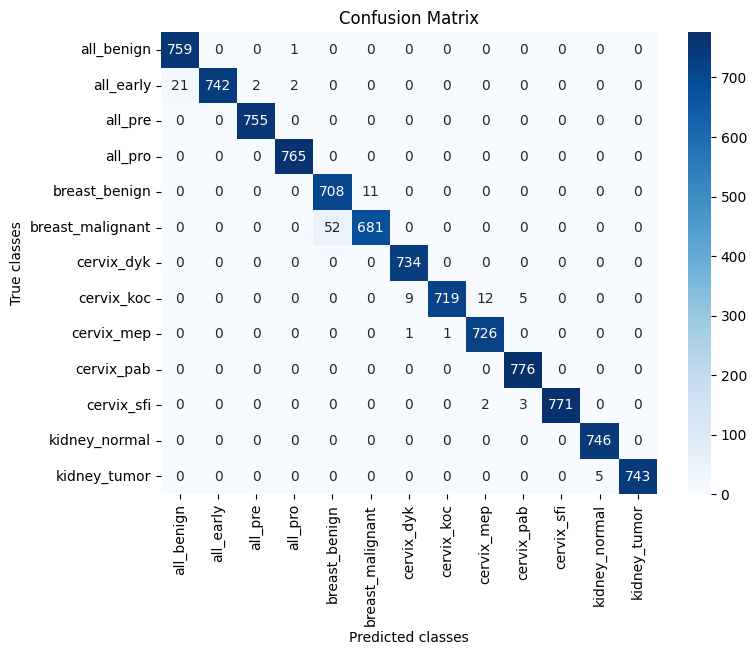

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(true_labels, predicted_labels)

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9869770303527482
Precision: 0.9873001054518301
Recall: 0.9869770303527482
F1-Score: 0.9869553098975264
Confusion Matrix:
[[759   0   0   1   0   0   0   0   0   0   0   0   0]
 [ 21 742   2   2   0   0   0   0   0   0   0   0   0]
 [  0   0 755   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 765   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 708  11   0   0   0   0   0   0   0]
 [  0   0   0   0  52 681   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 734   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9 719  12   5   0   0   0]
 [  0   0   0   0   0   0   1   1 726   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 776   0   0   0]
 [  0   0   0   0   0   0   0   0   2   3 771   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 746   0]
 [  0   0   0   0   0   0   0   0   0   0   0   5 743]]
